# Obtaining and Exploring a Real-World Corpus

In industry, you almost never start with a perfectly curated list of documents.
You start by:

- locating an existing corpus

- understanding its scope and structure

- checking what it contains and what it does not

- inspecting it before deciding how to preprocess it

https://stateoftheunion.onetwothree.net/

https://www.kaggle.com/datasets/nltkdata/state-union-corpus

## Loading a Real Corpus (State of the Union)

NLTK includes a built-in corpus of all U.S. State of the Union addresses spanning more than two centuries.

In [2]:
#!pip install nltk
#!pip install scipy

# Import libraries
import nltk
from nltk.corpus import state_union
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("punkt_tab")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/johnpaultamburro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnpaultamburro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/johnpaultamburro/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
nltk.download('state_union')

[nltk_data] Downloading package state_union to
[nltk_data]     /Users/johnpaultamburro/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.


True

In [7]:
state_union.fileids()[:10]

['1945-Truman.txt',
 '1946-Truman.txt',
 '1947-Truman.txt',
 '1948-Truman.txt',
 '1949-Truman.txt',
 '1950-Truman.txt',
 '1951-Truman.txt',
 '1953-Eisenhower.txt',
 '1954-Eisenhower.txt',
 '1955-Eisenhower.txt']

- Each file corresponds to one speech, typically named by year and president.
- Each file is a document.
- The full collection is a corpus.

## Understanding Corpus Scope

In [9]:
num_files = len(state_union.fileids())
print(f'The State of the Union corpus contains {num_files} files.')

num_words = sum(len(state_union.words(fileid)) for fileid in state_union.fileids())
print(f'The State of the Union corpus contains {num_words} words.')

The State of the Union corpus contains 65 files.
The State of the Union corpus contains 399822 words.


- This corpus spans over 200 years of political language.
- This makes it suitable for temporal, historical, and policy trend analysis.

# Inspecting Raw Text (No Processing Yet)
Before tokenization, normalization, or cleaning, we inspect the raw text.

In [14]:
sample_file = state_union.fileids()[0]
raw_text = state_union.raw(sample_file)
print(sample_file)
print(f'Raw text from {sample_file}:\n')
print(raw_text[:1000])  # Print the first 500 characters

1945-Truman.txt
Raw text from 1945-Truman.txt:

PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS
 
April 16, 1945

Mr. Speaker, Mr. President, Members of the Congress:
It is with a heavy heart that I stand before you, my friends and colleagues, in the Congress of the United States.
Only yesterday, we laid to rest the mortal remains of our beloved President, Franklin Delano Roosevelt. At a time like this, words are inadequate. The most eloquent tribute would be a reverent silence.
Yet, in this decisive hour, when world events are moving so rapidly, our silence might be misunderstood and might give comfort to our enemies.
In His infinite wisdom, Almighty God has seen fit to take from us a great man who loved, and was beloved by, all humanity.
No man could possibly fill the tremendous void left by the passing of that noble soul. No words can ease the aching hearts of untold millions of every race, creed and color. The world knows it has lost a heroic champion of 

- Is this clean or messy text?

- Do you see formatting artifacts?

- Would you need domain-specific cleaning?

In [15]:
# Inspect the first 500 words of the 1945 Truman address
truman_1945_words = state_union.words('1945-Truman.txt')[:500]
#truman_1945_text = ' '.join(truman_1945_words)  # Join words into a single string

In [16]:
truman_1945_words

['PRESIDENT',
 'HARRY',
 'S',
 '.',
 'TRUMAN',
 "'",
 'S',
 'ADDRESS',
 'BEFORE',
 'A',
 'JOINT',
 'SESSION',
 'OF',
 'THE',
 'CONGRESS',
 'April',
 '16',
 ',',
 '1945',
 'Mr',
 '.',
 'Speaker',
 ',',
 'Mr',
 '.',
 'President',
 ',',
 'Members',
 'of',
 'the',
 'Congress',
 ':',
 'It',
 'is',
 'with',
 'a',
 'heavy',
 'heart',
 'that',
 'I',
 'stand',
 'before',
 'you',
 ',',
 'my',
 'friends',
 'and',
 'colleagues',
 ',',
 'in',
 'the',
 'Congress',
 'of',
 'the',
 'United',
 'States',
 '.',
 'Only',
 'yesterday',
 ',',
 'we',
 'laid',
 'to',
 'rest',
 'the',
 'mortal',
 'remains',
 'of',
 'our',
 'beloved',
 'President',
 ',',
 'Franklin',
 'Delano',
 'Roosevelt',
 '.',
 'At',
 'a',
 'time',
 'like',
 'this',
 ',',
 'words',
 'are',
 'inadequate',
 '.',
 'The',
 'most',
 'eloquent',
 'tribute',
 'would',
 'be',
 'a',
 'reverent',
 'silence',
 '.',
 'Yet',
 ',',
 'in',
 'this',
 'decisive',
 'hour',
 ',',
 'when',
 'world',
 'events',
 'are',
 'moving',
 'so',
 'rapidly',
 ',',
 'our'

# Words vs Sentences vs Characters?
At this stage, we only explore structure.

In [20]:
num_characters = len(raw_text)
print(f'The raw text contains {num_characters} characters.')
num_words = len(state_union.words(sample_file))
print(f'The raw text contains {num_words} words.')
num_sentences = len(nltk.sent_tokenize(raw_text))
print(f'The raw text contains {num_sentences} sentences.')

The raw text contains 10914 characters.
The raw text contains 2138 words.
The raw text contains 114 sentences.


In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
tokens_nltk = word_tokenize(raw_text)
sentences_nltk = sent_tokenize(raw_text)

In [25]:
sentences_nltk  # Display the first 5 sentences

["PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS\n \nApril 16, 1945\n\nMr. Speaker, Mr. President, Members of the Congress:\nIt is with a heavy heart that I stand before you, my friends and colleagues, in the Congress of the United States.",
 'Only yesterday, we laid to rest the mortal remains of our beloved President, Franklin Delano Roosevelt.',
 'At a time like this, words are inadequate.',
 'The most eloquent tribute would be a reverent silence.',
 'Yet, in this decisive hour, when world events are moving so rapidly, our silence might be misunderstood and might give comfort to our enemies.',
 'In His infinite wisdom, Almighty God has seen fit to take from us a great man who loved, and was beloved by, all humanity.',
 'No man could possibly fill the tremendous void left by the passing of that noble soul.',
 'No words can ease the aching hearts of untold millions of every race, creed and color.',
 'The world knows it has lost a heroic champion of justice a

# Quick Corpus-Wide Exploration

In [29]:
doc_lengths = {
    fileid:len(state_union.words(fileid))
    for fileid in state_union.fileids()
}
doc_lengths

{'1945-Truman.txt': 2138,
 '1946-Truman.txt': 30650,
 '1947-Truman.txt': 6740,
 '1948-Truman.txt': 5705,
 '1949-Truman.txt': 3817,
 '1950-Truman.txt': 5673,
 '1951-Truman.txt': 4514,
 '1953-Eisenhower.txt': 7777,
 '1954-Eisenhower.txt': 6774,
 '1955-Eisenhower.txt': 8200,
 '1956-Eisenhower.txt': 9190,
 '1957-Eisenhower.txt': 4633,
 '1958-Eisenhower.txt': 5589,
 '1959-Eisenhower.txt': 5607,
 '1960-Eisenhower.txt': 6311,
 '1961-Kennedy.txt': 6634,
 '1962-Kennedy.txt': 7603,
 '1963-Johnson.txt': 1878,
 '1963-Kennedy.txt': 6218,
 '1964-Johnson.txt': 3675,
 '1965-Johnson-1.txt': 4966,
 '1965-Johnson-2.txt': 4192,
 '1966-Johnson.txt': 6253,
 '1967-Johnson.txt': 8221,
 '1968-Johnson.txt': 5689,
 '1969-Johnson.txt': 4660,
 '1970-Nixon.txt': 5019,
 '1971-Nixon.txt': 4558,
 '1972-Nixon.txt': 4512,
 '1973-Nixon.txt': 1873,
 '1974-Nixon.txt': 5805,
 '1975-Ford.txt': 4760,
 '1976-Ford.txt': 5617,
 '1977-Ford.txt': 5342,
 '1978-Carter.txt': 5238,
 '1979-Carter.txt': 3764,
 '1980-Carter.txt': 3871,
 

In [27]:
!pip install matplotlib

Text(0.5, 1.0, 'Distribution of Document Lengths in State of the Union Corpus')

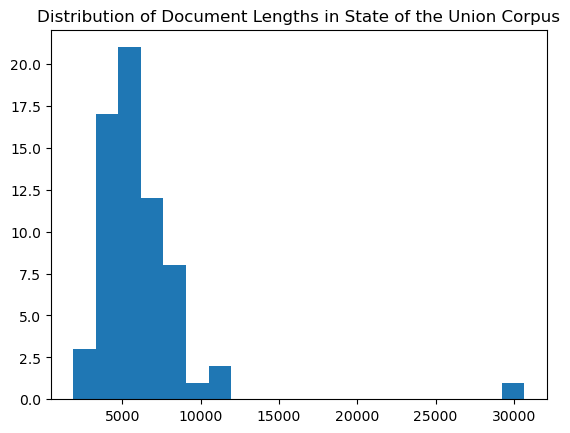

In [30]:
import matplotlib.pyplot as plt
plt.hist(doc_lengths.values(), bins=20)
plt.title('Distribution of Document Lengths in State of the Union Corpus')

In the next section, we will treat each State of the Union address as a document and the full collection as a corpus. We will begin designing preprocessing pipelines using both NLTK and spaCy, and we will compare how each library handles the same steps.